# MODEL TRAINING

In [109]:
dataset_scaled.head()
dataset_scaled.isnull().sum()

name                            0
year                            0
selling_price                   0
km_driven                       0
seats                           0
mileage_kmpl                    0
max_power                       0
torque_Nm                       0
torque_rpm                      0
engine_cc                       0
seller_type_Dealer              0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Automatic          0
transmission_Manual             0
owner_First Owner               0
owner_Fourth & Above Owner      0
owner_Second Owner              0
owner_Test Drive Car            0
owner_Third Owner               0
dtype: int64

In [110]:
X = dataset_scaled.drop('selling_price', axis=1) 
y = dataset_scaled['selling_price']

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [112]:
from sklearn.ensemble import ExtraTreesRegressor 
rf = ExtraTreesRegressor()
rf.fit(X_train, y_train)

ExtraTreesRegressor()

In [113]:
rf.score(X_test , y_test)

0.9723113245865075

In [114]:
y_pred = rf.predict(X_train)

In [115]:
rf.score(X_train , y_train) *100

99.96492375519252

/Users/lumiousk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

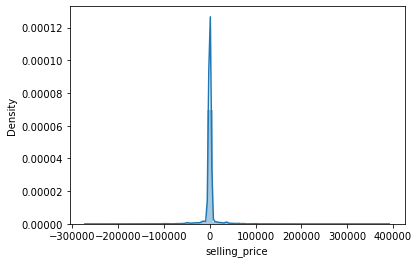

In [116]:
sns.distplot( y_train - y_pred)

# Hyperparameter Tuning

In [117]:

from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [118]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [119]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [120]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [121]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [122]:
rf_new = ExtraTreesRegressor(n_estimators = 700, min_samples_split= 15, min_samples_leaf = 1, max_features = 'auto', max_depth = 20)

In [123]:
rf_new.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [124]:
rf_new.score(X_test, y_test)

0.9725224050173779